<a href="https://colab.research.google.com/github/JBLozada/CPE-310-2526A/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


 *Data* Loading & Overview. Load the CSV into a DataFrame. What are its dimensions (.shape)? Display the first and last five rows. What insights do you immediately notice about the columns?

In [32]:
import pandas as pd

path= "/content/netflix_titles.csv"
dataFrame = pd.read_csv(path)
dataFrame.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [34]:
dimension= dataFrame.shape

print(dataFrame.head())
print(dataFrame.tail())



print(dataFrame.shape)

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

# Data Cleaning. Which columns contain missing values? How might you handle missing entries? Drop them or fill with a placeholder?

In [53]:
missing= dataFrame.isnull().sum()
missing[missing > 0]
dataFrame_clean = dataFrame.dropna()
dataFrame_clean = dataFrame.dropna(axis=1)

print(dataFrame_clean)
print(dataFrame.shape)

     show_id     type                  title  release_year  \
0         s1    Movie   Dick Johnson Is Dead          2020   
1         s2  TV Show          Blood & Water          2021   
2         s3  TV Show              Ganglands          2021   
3         s4  TV Show  Jailbirds New Orleans          2021   
4         s5  TV Show           Kota Factory          2021   
...      ...      ...                    ...           ...   
8802   s8803    Movie                 Zodiac          2007   
8803   s8804  TV Show            Zombie Dumb          2018   
8804   s8805    Movie             Zombieland          2009   
8805   s8806    Movie                   Zoom          2006   
8806   s8807    Movie                 Zubaan          2015   

                                              listed_in  \
0                                         Documentaries   
1       International TV Shows, TV Dramas, TV Mysteries   
2     Crime TV Shows, International TV Shows, TV Act...   
3                  

**Data Types & Conversion. Check each column’s data type. Are there any that you need to convert (like date to datetime type)**

In [56]:
print(dataFrame.dtypes)


show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


Univariate Analysis. How many Movies vs. TV Shows are there? What are the top five most common ratings? Which release year appears most frequently?


rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
Name: count, dtype: int64


,count
release_year,
2018,1147
2017,1032
2019,1030
2020,953


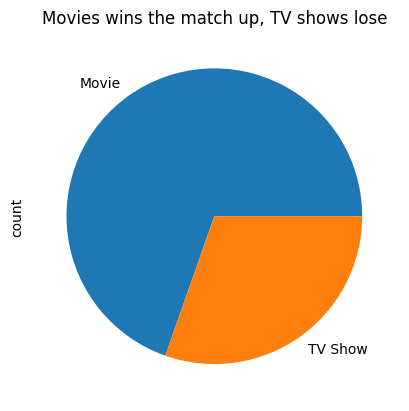

In [82]:
dataFrame['type'].value_counts()
dataFrame['type'].value_counts().plot(kind='pie', title='Movies wins the match up, TV shows lose')


print(dataFrame['rating'].value_counts().head(5))
(dataFrame['release_year'].value_counts().head(4))




## *Duration & Seasons. Parse duration into numeric minutes (for movies) and number of seasons (for shows). What is the average movie length? The average number of seasons per TV show?`*


In [119]:
import pandas as pd

# 📚 Step 1: Import pandas
import pandas as pd

# 🗂️ Step 2: Load your CSV file
# Make sure you upload 'netflix_titles.csv' to Colab first (from the left folder icon)
dataFrame = pd.read_csv("netflix_titles.csv")

# 🎬 Step 3: Separate Movies and TV Shows
movies = dataFrame[dataFrame['type'] == 'Movie']
shows = dataFrame[dataFrame['type'] == 'TV Show']

# 🍿 Step 4: Convert movie duration (e.g. "90 min") to numbers
movies['minutes'] = movies['duration'].str.replace(' min', '', regex=False).astype(float)

# 📺 Step 5: Convert TV show duration (e.g. "2 Seasons") to numbers
shows['seasons'] = shows['duration'].str.replace(' Season', '', regex=False)
shows['seasons'] = shows['seasons'].str.replace('s', '', regex=False).astype(float)

print("🎬 Average movie length:", round(average_movie_length, 1), "minutes")
print("📺 Average number of seasons per TV show:", round(average_show_seasons, 1))


🎬 Average movie length: 99.6 minutes
📺 Average number of seasons per TV show: 1.8


/tmp/ipython-input-1330097899.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['minutes'] = movies['duration'].str.replace(' min', '', regex=False).astype(float)
/tmp/ipython-input-1330097899.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shows['seasons'] = shows['duration'].str.replace(' Season', '', regex=False)
/tmp/ipython-input-1330097899.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

🎬 Average movie length: 99.6 minutes
📺 Average number of seasons per TV show: 1.8


/tmp/ipython-input-2334443966.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['minutes'] = movies['duration'].str.replace(' min', '', regex=False).astype(float)
/tmp/ipython-input-2334443966.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shows['seasons'] = shows['duration'].str.replace(' Season', '', regex=False)
/tmp/ipython-input-2334443966.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

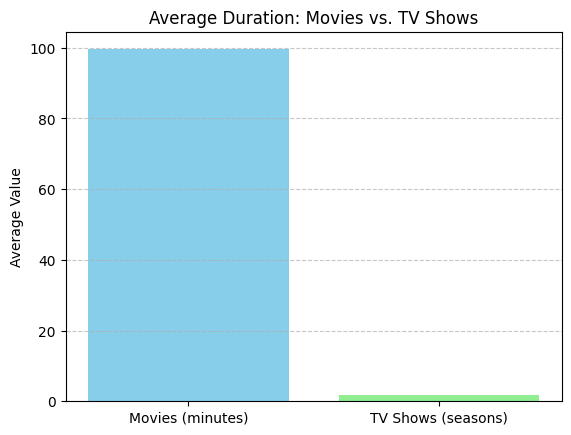

In [120]:

import pandas as pd


dataFrame = pd.read_csv("netflix_titles.csv")

# 🎬 Step 3: Separate Movies and TV Shows
movies = dataFrame[dataFrame['type'] == 'Movie']
shows = dataFrame[dataFrame['type'] == 'TV Show']

# 🍿 Step 4: Convert movie duration (e.g. "90 min") to numbers
movies['minutes'] = movies['duration'].str.replace(' min', '', regex=False).astype(float)

# 📺 Step 5: Convert TV show duration (e.g. "2 Seasons") to numbers
shows['seasons'] = shows['duration'].str.replace(' Season', '', regex=False)
shows['seasons'] = shows['seasons'].str.replace('s', '', regex=False).astype(float)

# 📊 Step 6: Calculate averages
average_movie_length = movies['minutes'].mean()
average_show_seasons = shows['seasons'].mean()

# 🧾 Step 7: Print results
print("🎬 Average movie length:", round(average_movie_length, 1), "minutes")
print("📺 Average number of seasons per TV show:", round(average_show_seasons, 1))

# 📉 Step 8: Create a simple bar chart
labels = ['Movies (minutes)', 'TV Shows (seasons)']
values = [average_movie_length, average_show_seasons]

plt.bar(labels, values, color=['skyblue', 'lightgreen'])
plt.title('Average Duration: Movies vs. TV Shows')
plt.ylabel('Average Value')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Genre Analysis. Which genre has the highest average release year? What might that indicate

In [121]:
import pandas as pd

dataFrame_titles = pd.read_csv('netflix_titles.csv')


dataFrame_genres_expanded = dataFrame_titles.assign(genre=dataFrame_titles['listed_in'].str.split(', ')).explode('genre')

average_year_by_genre = dataFrame_genres_expanded.groupby('genre')['release_year'].mean().sort_values(ascending=False)

print(average_year_by_genre.head())

highest_avg_year_genre = average_year_by_genre.index[0]
highest_avg_year = average_year_by_genre.iloc[0]

print(f"\nGenre with the highest average release year: {highest_avg_year_genre} (Avg Year: {highest_avg_year:.2f})")



genre
TV Mysteries                    2018.346939
TV Horror                       2018.200000
Reality TV                      2017.894118
Stand-Up Comedy & Talk Shows    2017.857143
TV Thrillers                    2017.736842
Name: release_year, dtype: float64

Genre with the highest average release year: TV Mysteries (Avg Year: 2018.35)


Temporal Trends. Are there spikes or drops? Compare release_year vs. year_added: how long after release does Netflix typically acquire content?

In [126]:
# Convert 'date_added' to a proper date format
dataFrame['date_added'] = pd.to_datetime(dataFrame['date_added'], errors='coerce')

# Get the year Netflix added the content
dataFrame['year_added'] = dataFrame['date_added'].dt.year

# Calculate the difference in years: when Netflix added it minus when it was released
dataFrame['time_to_acquire'] = dataFrame['year_added'] - dataFrame['release_year']

# Clean up the 'time_to_acquire' data:
# 1. Remove entries where the time is missing (NaN)
# 2. Remove entries where Netflix added content before it was released (negative time, likely data error)
clean_acquisition_times = dataFrame['time_to_acquire'].dropna()
clean_acquisition_times = clean_acquisition_times[clean_acquisition_times >= 0]

# Calculate the average time Netflix takes to acquire content
average_acquisition_time = clean_acquisition_times.mean()

print(f"On average, Netflix gets content {average_acquisition_time:.2f} years after it's released.")

# Now, let's visualize this with a simple graph
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
clean_acquisition_times.hist(bins=range(0, int(clean_acquisition_times.max()) + 2), edgecolor='black')
plt.title('How Long Netflix Waits to Add Content')
plt.xlabel('Years After Release (Acquisition Lag)')
plt.ylabel('Number of Titles')
plt.xticks(range(0, int(clean_acquisition_times.max()) + 2, 5))
plt.grid(axis='y', alpha=0.75)
plt.show()

      release_year          date_added
0             2020  September 25, 2021
1             2021  September 24, 2021
2             2021  September 24, 2021
3             2021  September 24, 2021
4             2021  September 24, 2021
...            ...                 ...
8802          2007   November 20, 2019
8803          2018        July 1, 2019
8804          2009    November 1, 2019
8805          2006    January 11, 2020
8806          2015       March 2, 2019

[8807 rows x 2 columns]


Rating vs. Type. Create a cross-tab or pivot table of type vs. rating. Which rating dominates movies compared to TV shows?

In [139]:
pivot=  pd.pivot_table(dataFrame, index=["type", "rating"], aggfunc='size')
pivot

type     rating  
Movie    66 min         1
         74 min         1
         84 min         1
         G             41
         NC-17          3
         NR            75
         PG           287
         PG-13        490
         R            797
         TV-14       1427
         TV-G         126
         TV-MA       2062
         TV-PG        540
         TV-Y         131
         TV-Y7        139
         TV-Y7-FV       5
         UR             3
TV Show  NR             5
         R              2
         TV-14        733
         TV-G          94
         TV-MA       1145
         TV-PG        323
         TV-Y         176
         TV-Y7        195
         TV-Y7-FV       1
dtype: int64

# Filtering & Querying. Extract all titles with rating “R” added after 2020. How many?

In [141]:
dataFrame['date_added'] = pd.to_datetime(dataFrame['date_added'], format='mixed')
r_rated_after_2020 = dataFrame[(dataFrame['rating'] == 'R') & (dataFrame['date_added'].dt.year > 2020)]

print(f"Number of 'R' rated titles added after 2020: {len(r_rated_after_2020)}")
print("These titles are:")
print(r_rated_after_2020[['title', 'rating', 'date_added']])

Number of 'R' rated titles added after 2020: 190
These titles are:
                                title rating date_added
46                         Safe House      R 2021-09-16
48                       Training Day      R 2021-09-16
81                               Kate      R 2021-09-10
122                        In the Cut      R 2021-09-02
131       Blade Runner: The Final Cut      R 2021-09-01
...                               ...    ...        ...
8072                  Spring Breakers      R 2021-01-10
8106                       Striptease      R 2021-01-01
8126                         Superbad      R 2021-01-01
8272                     The Departed      R 2021-01-01
8320  The Girl with the Dragon Tattoo      R 2021-01-05

[190 rows x 3 columns]


Aggregations & GroupBy. For each country, compute the average release year of its titles. Group by year_added and compute the proportion of Movies vs. TV Shows added each year.

In [146]:
# Ensure 'date_added' is in datetime format and extract the year
dataFrame['date_added'] = pd.to_datetime(dataFrame['date_added'], errors='coerce')
dataFrame['year_added'] = dataFrame['date_added'].dt.year

# Group by year_added and type, then count
yearly_counts = dataFrame.groupby(['year_added', 'type']).size().unstack(fill_value=0)

# Calculate proportions
yearly_counts['Total'] = yearly_counts['Movie'] + yearly_counts['TV Show']
yearly_counts['Movie_Proportion'] = yearly_counts['Movie'] / yearly_counts['Total']
yearly_counts['TVShow_Proportion'] = yearly_counts['TV Show'] / yearly_counts['Total']

print("\nProportion of Movies vs. TV Shows added each year:\n", yearly_counts[['Movie_Proportion', 'TVShow_Proportion']])


Proportion of Movies vs. TV Shows added each year:
 type        Movie_Proportion  TVShow_Proportion
year_added                                     
2008.0              0.500000           0.500000
2009.0              1.000000           0.000000
2010.0              1.000000           0.000000
2011.0              1.000000           0.000000
2012.0              1.000000           0.000000
2013.0              0.545455           0.454545
2014.0              0.791667           0.208333
2015.0              0.682927           0.317073
2016.0              0.589744           0.410256
2017.0              0.706229           0.293771
2018.0              0.750152           0.249848
2019.0              0.706349           0.293651
2020.0              0.683342           0.316658
2021.0              0.662884           0.337116


In [145]:
# Calculate average release year for each country and display the full series
average_release_year_by_country = dataFrame.groupby('country')['release_year'].mean().sort_values(ascending=False)
print("Average Release Year by Country:\n", average_release_year_by_country)

Average Release Year by Country:
 country
Italy, United Kingdom                                  2021.0
Mauritius                                              2021.0
Belgium, United Kingdom                                2021.0
United States, Singapore                               2021.0
Mexico, France, Colombia                               2021.0
                                                        ...  
Poland,                                                1975.0
United Kingdom, West Germany                           1972.0
United States, East Germany, West Germany              1971.0
United States, Italy, United Kingdom, Liechtenstein    1965.0
India, Malaysia                                        1960.0
Name: release_year, Length: 748, dtype: float64


# Applying Functions. Write a function that, given a director’s name, returns their titles sorted by release_year. Create a reusable function to plot the top N categories for any categorical column

### Function 1: Get Director's Titles Sorted by Release Year

In [161]:
def get_director_titles(df, director_name):
    """
    Returns a DataFrame of titles directed by the given director,
    sorted by release_year.

    Args:
        df (pd.DataFrame): The input DataFrame.
        director_name (str): The name of the director.

    Returns:
        pd.DataFrame: Titles by the director, sorted by release_year.
    """
    director_titles = df[df['director'] == director_name]
    sorted_titles = director_titles.sort_values(by='release_year', ascending=False)
    return sorted_titles[['title', 'type', 'release_year', 'date_added']]

# Ensure dataFrame_titles['date_added'] is in datetime format before use
# This conversion might have been done earlier, but re-doing for robustness
dataFrame_titles['date_added'] = pd.to_datetime(dataFrame_titles['date_added'], errors='coerce')

# Example Usage for Director Titles:
# Let's use 'Kirsten Johnson' as an example director.
# Using dataFrame_titles which contains the full dataset
director_name_example = 'Kirsten Johnson'
kj_titles = get_director_titles(dataFrame_titles, director_name_example)

print(f"Titles by {director_name_example}, sorted by release year:")
if not kj_titles.empty:
    display(kj_titles)
else:
    print("No titles found for this director.")

Titles by Kirsten Johnson, sorted by release year:


,title,type,release_year,date_added
0,Dick Johnson Is Dead,Movie,2020,2021-09-25


### Function 2: Plot Top N Categories for a Categorical Column


Plotting Top 5 Ratings:


/tmp/ipython-input-491013716.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')


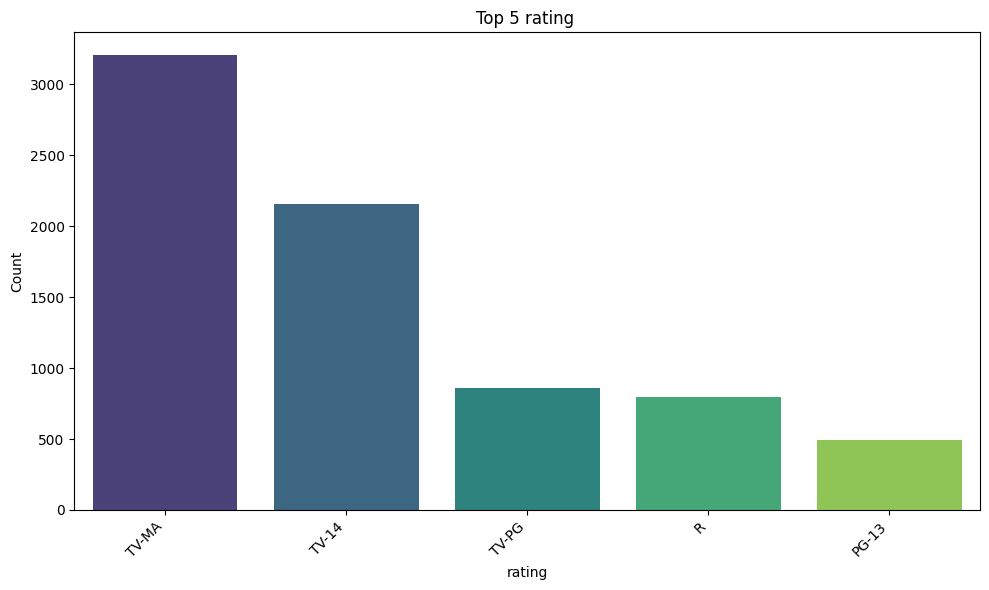


Plotting Top 7 Countries:


/tmp/ipython-input-491013716.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')


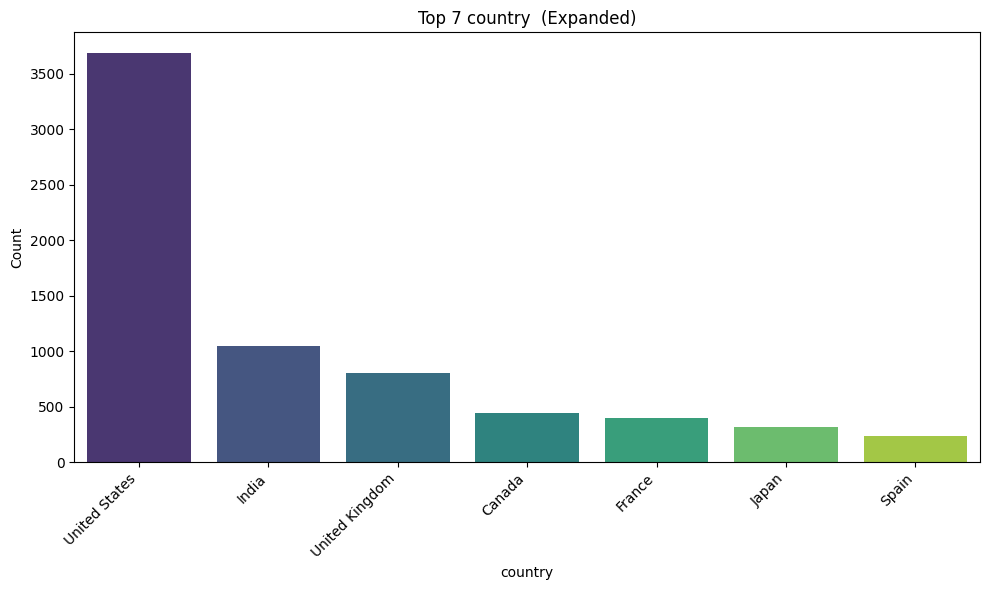

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_top_n_categories(df, column_name, n=5, title_suffix=""):
    """
    Plots the top N categories for a specified categorical column in a DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame.
        column_name (str): The name of the categorical column to plot.
        n (int): The number of top categories to display. Defaults to 5.
        title_suffix (str): Optional suffix to add to the plot title.
    """
    if column_name not in df.columns:
        print(f"Error: Column '{column_name}' not found in the DataFrame.")
        return

    # Get value counts and select top N
    top_categories = df[column_name].value_counts().head(n)

    if top_categories.empty:
        print(f"No data to plot for column '{column_name}'.")
        return

    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')
    plt.title(f'Top {n} {column_name} {title_suffix}')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Example Usage for Plotting Top N Categories:
# Using dataFrame_titles which contains the full dataset
print("\nPlotting Top 5 Ratings:")
plot_top_n_categories(dataFrame_titles, 'rating', n=5)

print("\nPlotting Top 7 Countries:")
# For 'country', we might have multiple countries per entry, so we'll clean it up a bit for a more meaningful plot
df_countries_expanded = dataFrame_titles.assign(country=dataFrame_titles['country'].str.split(', ')).explode('country')
plot_top_n_categories(df_countries_expanded, 'country', n=7, title_suffix=' (Expanded)')